# Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


# Loading dataset

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load your model (make sure it's trained and saved)
model = load_model('model/garbage_model.h5')  # Update path if needed

# Path to a test image
img_path = 'test_images/plastic_bottle.jpg'  # Put your test image here

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

# Your class labels (must match training)
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Show result
print("Predicted Class:", classes[class_index])


ModuleNotFoundError: No module named 'google.colab'

In [3]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("archive (6).zip", 'r') as zip_ref:
    zip_ref.extractall("garbage_classification")


In [11]:
import os

def print_folder_structure(start_path):
    for root, dirs, files in os.walk(start_path):
        level = root.replace(start_path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files[:5]:  # Only show up to 5 files per folder for clarity
            print(f"{sub_indent}{f}")

print_folder_structure('garbage_classification')



garbage_classification/
    zero-indexed-files.txt
    one-indexed-files-notrash_test.txt
    one-indexed-files.txt
    one-indexed-files-notrash_train.txt
    one-indexed-files-notrash_val.txt
    garbage classification/
        Garbage classification/
            metal/
                metal380.jpg
                metal255.jpg
                metal20.jpg
                metal404.jpg
                metal55.jpg
            trash/
                trash43.jpg
                trash106.jpg
                trash38.jpg
                trash18.jpg
                trash63.jpg
            paper/
                paper436.jpg
                paper50.jpg
                paper299.jpg
                paper239.jpg
                paper491.jpg
            glass/
                glass298.jpg
                glass196.jpg
                glass14.jpg
                glass89.jpg
                glass240.jpg
            cardboard/
                cardboard275.jpg
                cardboard10.jpg
           

In [12]:
base_dir = '/content/garbage_classification/garbage classification/Garbage classification'


# Data preprocessing

In [13]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


# MOdel builting

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),  # New layer
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 349ms/step - accuracy: 0.2478 - loss: 1.7180 - val_accuracy: 0.3201 - val_loss: 1.6657
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.4033 - loss: 1.4720 - val_accuracy: 0.3419 - val_loss: 1.5169
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - accuracy: 0.4632 - loss: 1.3004 - val_accuracy: 0.4155 - val_loss: 1.4274
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.5314 - loss: 1.2209 - val_accuracy: 0.4175 - val_loss: 1.4349
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.5978 - loss: 1.0629 - val_accuracy: 0.4254 - val_loss: 1.4106
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.5964 - loss: 1.0650 - val_accuracy: 0.4513 - val_loss: 1.4046
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.6011 - loss: 1.0479 - val_accuracy: 0.5030 - val_loss: 1.3443
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - accuracy: 0.6350 - loss: 0.9369 - val_accu

# Plot Accuracy

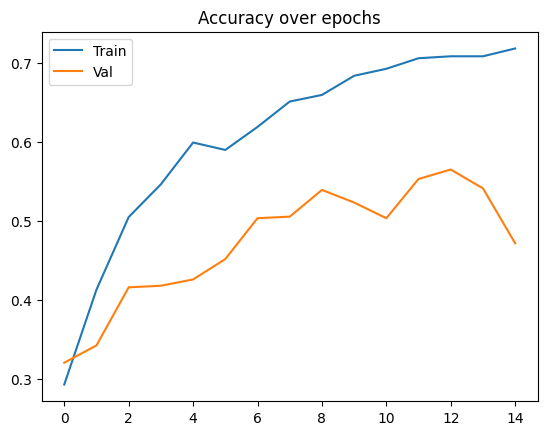

In [22]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()


#  Predict & Visualize

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


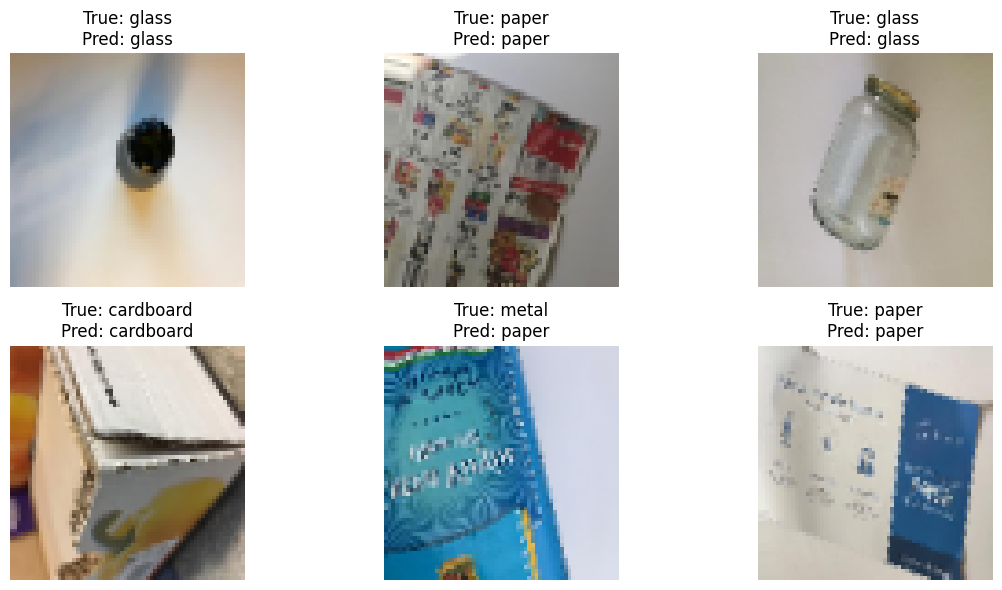

In [23]:
class_names = list(train_generator.class_indices.keys())

def visualize_prediction():
    # Changed test_generator to val_generator
    imgs, labels = next(val_generator)
    preds = model.predict(imgs)

    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(imgs[i])
        true_label = class_names[np.argmax(labels[i])]
        pred_label = class_names[np.argmax(preds[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_prediction()

# Save model

In [24]:
model.save('garbage_classifier.h5')